In [ ]:
from pyrosm import OSM
from pyrosm import get_data
import osmnx  as ox
fp = OSM("oslo-latest.osm.pbf")

In [ ]:
nodes, edges = fp.get_network(nodes=True)

In [ ]:
edges["highway"]

In [ ]:
edges

In [ ]:
for f in edges.columns:
    print(f, edges[f].unique())
    print("4 meter" in edges[f].unique())

In [ ]:
for f in nodes.columns:
    try:
        print(f, nodes[f].unique())
        print("4 meter" in nodes[f].unique())
    except:
        pass

In [ ]:
from pyrosm import OSM
from pyrosm import get_data

fp = OSM("akerhus-latest.osm.pbf")
nodes_a, edges_a = fp.get_network(nodes=True)

In [2]:
import numpy as np
np.float(10)

AttributeError: module 'numpy' has no attribute 'float'

In [1]:
from pyrosm import OSM
from pyrosm import get_data

fp = OSM("all.osm.pbf")
nodes, edges = fp.get_network(nodes=True)
edges["maxspeed"] = edges["maxspeed"].fillna("50")
edges["maxspeed"] = edges["maxspeed"].astype("int")
edges["min_time"] = (edges["length"]/1000)/(edges["maxspeed"])

edges = edges.fillna("None")
edges["highway"] = edges["highway"].astype("str")
edges["motor_vehicle"] = edges["motor_vehicle"].astype("str")
edges = edges[edges["highway"].isin(["service", "residential", "unclassified", "track", "secondary", "primary", "tertiary", "trunk", "living_street", "trunk_link", "primary_link", "secondary_link", "yes", "tertiary_link"])]
edges = edges[edges["motorcar"] != "no"]

c:\Users\jon39\Anaconda3\envs\pyrosm\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


KeyboardInterrupt: 

In [96]:
from pyrosm import OSM
from pyrosm import get_data
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import numpy as np


fp = OSM("all.osm.pbf")
nodes, edges = fp.get_network(nodes=True)

edges["highway"] = edges["highway"].astype("str")
edges = edges[edges["highway"].isin(["service", "residential", "unclassified", "track", "secondary", "primary", "tertiary", "trunk", "living_street", "trunk_link", "primary_link", "secondary_link", "yes", "tertiary_link"])]
nodes = nodes[nodes["id"].isin(edges["u"]) | nodes["id"].isin(edges["v"])]

df = edges.merge(nodes, left_on="u", right_on="id", how="left")
df1 = df[df["maxspeed"].notna()]
df2 = df[df["maxspeed"].isna()]
x = np.array(df1[["lat", "lon"]])
y = np.array(df1[["maxspeed"]].astype("int"))

x2 = np.array(df2[["lat", "lon"]])
neigh = KNeighborsClassifier(n_neighbors=10, weights="distance")
neigh.fit(x, y)
maxspeeds = neigh.predict(x2)
edges.loc[edges["maxspeed"].isna(), "maxspeed"] = maxspeeds

edges["maxspeed"] = edges["maxspeed"].astype("int")
edges["min_time"] = (edges["length"]/1000)/(edges["maxspeed"])


c:\Users\jon39\Anaconda3\envs\pyrosm\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [45]:
edges["highway"].value_counts()

service           523276
path              445019
footway           260255
residential       254572
unclassified      167023
track             156726
cycleway           93166
secondary          79554
primary            44404
tertiary           36728
trunk              14563
living_street      10441
steps               4985
trunk_link          4533
bridleway           3865
pedestrian          1818
proposed             411
primary_link         254
construction         215
secondary_link       135
corridor              66
yes                   53
rest_area             35
tertiary_link         15
busway                12
elevator              11
road                  10
street_lamp            1
Name: highway, dtype: int64

In [4]:
zones

,geometry
0,"POLYGON ((10.34411 59.81516, 10.36188 59.81578..."
1,"POLYGON ((10.34035 59.84201, 10.35814 59.84264..."
2,"POLYGON ((10.36437 59.79789, 10.38213 59.79851..."
3,"POLYGON ((10.36312 59.80683, 10.38089 59.80746..."
4,"POLYGON ((10.36188 59.81578, 10.37965 59.81641..."
...,...
5900,"POLYGON ((11.39075 60.36938, 11.40884 60.36987..."
5901,"POLYGON ((11.37166 60.37785, 11.38976 60.37834..."
5902,"POLYGON ((11.37066 60.38681, 11.38876 60.38730..."
5903,"POLYGON ((11.36966 60.39577, 11.38777 60.39626..."


In [80]:
from pyrosm import OSM
from pyrosm import get_data

fp = OSM("all.osm.pbf")
nodes, edges = fp.get_network(nodes=True)

In [82]:
import networkx as nx
G = nx.from_pandas_edgelist(edges, 'u', 'v')
S = [G.subgraph(c).copy() for c in nx.connected_components(G.to_undirected())]
i = [len(list(s.nodes)) for s in S]

In [85]:
all = []
for s in S[1:]:
    all.extend(list(s.nodes))

In [89]:
df = final[final["id"].isin(all)]["index_right"]
print(520.0 in list(df))

True


In [95]:
ids = final[final["index_right"] == 520.0]["id"]
edges[edges["u"].isin(ids) | edges["v"].isin(ids)]["highway"].value_counts()

service         176
unclassified     50
cycleway         13
track             7
footway           1
Name: highway, dtype: int64

In [57]:
edges["highway"].fillna("none").value_counts()

service           523276
path              445019
footway           260255
residential       254572
unclassified      167023
track             156726
cycleway           93166
secondary          79554
primary            44404
tertiary           36728
trunk              14563
living_street      10441
steps               4985
trunk_link          4533
bridleway           3865
pedestrian          1818
proposed             411
primary_link         254
construction         215
secondary_link       135
corridor              66
yes                   53
rest_area             35
tertiary_link         15
busway                12
elevator              11
road                  10
street_lamp            1
Name: highway, dtype: int64

In [131]:

df = edges.merge(nodes, left_on="u", right_on="id", how="left")
df1 = df[df["maxspeed"].notna()]
df2 = df[df["maxspeed"].isna()]
x = np.array(df1[["lat", "lon"]])
y = np.array(df1[["maxspeed"]].astype("int"))

x2 = np.array(df2[["lat", "lon"]])
neigh = KNeighborsClassifier(n_neighbors=10, weights="distance")
neigh.fit(x, y)
maxspeeds = neigh.predict(x2)
edges.loc[edges["maxspeed"].isna(), "maxspeed"] = maxspeeds


c:\Users\jon39\Anaconda3\envs\pyrosm\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Index(['access', 'area', 'bicycle', 'bridge', 'busway', 'cycleway',
       'est_width', 'foot', 'footway', 'highway', 'int_ref', 'junction',
       'lanes', 'lit', 'maxspeed', 'motorcar', 'motorroad', 'motor_vehicle',
       'name', 'oneway', 'overtaking', 'path', 'passing_places', 'psv', 'ref',
       'service', 'segregated', 'sidewalk', 'smoothness', 'surface',
       'tracktype', 'tunnel', 'turn', 'width', 'winter_road', 'id',
       'timestamp', 'version', 'tags', 'osm_type', 'geometry', 'u', 'v',
       'length'],
      dtype='object')

In [50]:
edges["tracktype"].fillna("none").value_counts()

none      1982356
grade2      40385
grade5      27714
grade3      19485
grade4      17026
grade1      15180
Name: tracktype, dtype: int64

In [130]:
from mapbox.services.directions import Directions

In [135]:
4372*24

104928

In [129]:
import networkx as nx
G = nx.read_edgelist("adjacencyFinal")
print(len(G.edges))

4372


In [108]:
edges["maxspeed"].fillna("None").value_counts(normalize=True).sort_values()

90      0.000002
8       0.000015
25      0.000048
15      0.000078
5       0.000123
100     0.000134
10      0.000241
20      0.000470
70      0.003624
40      0.013109
60      0.019090
80      0.022899
50      0.028445
30      0.034787
None    0.876934
Name: maxspeed, dtype: float64

In [96]:
df = edges.merge(nodes, left_on="u", right_on="id", how="left")

In [89]:
df.columns

Index(['access', 'area', 'bicycle', 'bridge', 'busway', 'cycleway',
       'est_width', 'foot', 'footway', 'highway', 'int_ref', 'junction',
       'lanes', 'lit', 'maxspeed', 'motorcar', 'motorroad', 'motor_vehicle',
       'name', 'oneway', 'overtaking', 'path', 'passing_places', 'psv', 'ref',
       'service', 'segregated', 'sidewalk', 'smoothness', 'surface',
       'tracktype', 'tunnel', 'turn', 'width', 'winter_road', 'id_x',
       'timestamp_x', 'version_x', 'tags_x', 'osm_type', 'geometry_x', 'u',
       'v', 'length', 'lon', 'lat', 'tags_y', 'timestamp_y', 'version_y',
       'changeset', 'id_y', 'geometry_y'],
      dtype='object')

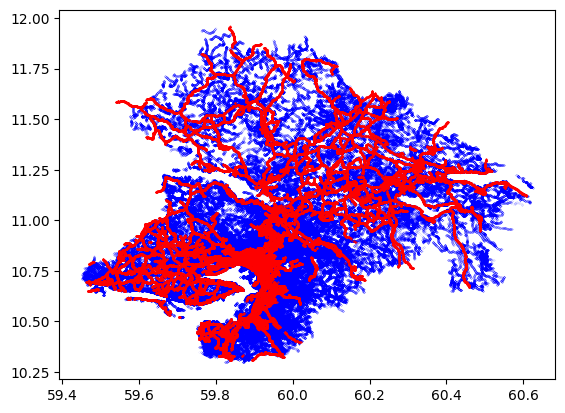

In [97]:
df2 = df[df["maxspeed"].isna()]
df3 = df[df["maxspeed"].notna()]
plt.scatter(df2["lat"], df2["lon"], s=0.001, color="blue")
plt.scatter(df3["lat"], df3["lon"], s=0.1, color="red")

In [110]:
df = edges.merge(nodes, left_on="u", right_on="id", how="left")
df = df[df["maxspeed"].notna()]

In [124]:
import numpy as np
df = df.sample(frac=1)
#tr = int(len(df.index)*(1/3))
tr = int(len(df.index)*0.12)
te = int(len(df.index)*(1-0.12))
x = np.array(df[["lat", "lon"]].head(tr))
y = np.array(df[["maxspeed"]].astype("int").head(tr))

In [125]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10, weights="distance")
neigh.fit(x, y)

c:\Users\jon39\Anaconda3\envs\pyrosm\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10, weights='distance')

In [126]:
x = np.array(df[["lat", "lon"]].tail(te))
y = np.array(df[["maxspeed"]].astype("int").tail(te))

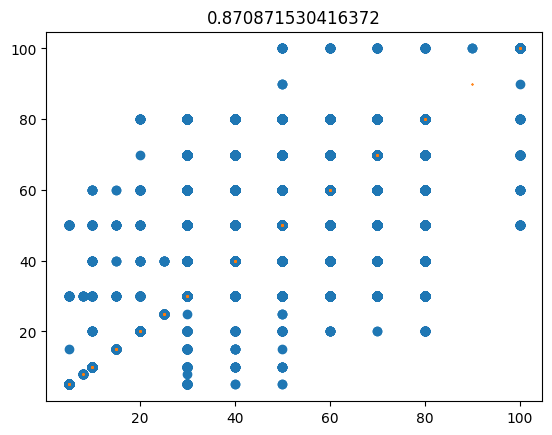

In [128]:
import matplotlib.pyplot as plt
plt.title(str(neigh.score(x,y)))
plt.scatter(neigh.predict(x), y)
plt.scatter(y,y, s=0.1)

In [121]:
from sklearn.metrics import f1_score

f1_score(neigh.predict(x), y, average="weighted")

0.870183483699204

In [85]:
print(neigh.predict(x), y)

[50 30 80 ... 30 50 50] [[50]
 [30]
 [80]
 ...
 [30]
 [50]
 [50]]


In [15]:
import pandas as pd
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(edges["width"].fillna("None").value_counts())

None       2085652
3             2851
2             2616
1             2129
0.5 m         1920
4             1248
5              967
0.5            931
0.2            599
0.3            513
0              380
1.5            337
2.5 m          315
6              195
9              166
2.5            150
0.4            117
4.2             89
6.8             77
4 m             60
0.6             56
3.5             55
7               55
<5              49
.5              48
6.5             48
80cm            46
-1              42
8               37
2.6             35
0.7             32
4.5             27
.3              24
3.3             24
3.6             23
4.4             21
14              21
1.6             18
0.8             17
<1m             12
0.2 m           12
1 m             12
11              11
550              9
1.8              9
2.0              8
2m               8
4.3              7
.4               7
13               7
2.8              6
20               6
0.3 m       

In [116]:
1 - 1843444/(258702+1843444)

0.12306566718011025

In [71]:
edges["motorcar"].value_counts()

None           2100013
private            888
no                 615
permissive         350
destination        230
yes                 32
unknown             18
Name: motorcar, dtype: int64

In [70]:
edges["highway"].value_counts()

service           523276
path              445019
footway           260255
residential       254572
unclassified      167023
track             156726
cycleway           93166
secondary          79554
primary            44404
tertiary           36728
trunk              14563
living_street      10441
steps               4985
trunk_link          4533
bridleway           3865
pedestrian          1818
proposed             411
primary_link         254
construction         215
secondary_link       135
corridor              66
yes                   53
rest_area             35
tertiary_link         15
busway                12
elevator              11
road                  10
street_lamp            1
Name: highway, dtype: int64

In [72]:
edges[~edges["highway"].isin(["service", "residential", "unclassified", "track", "secondary", "primary", "tetriary", "trunk", "living_street", "trunk_link", "primary_link", "secondary_link", "yes", "tertiary_link"])].value_counts()

KeyboardInterrupt: 

In [73]:
df = edges[~edges["highway"].isin(["service", "residential", "unclassified", "track", "secondary", "primary", "tertiary", "trunk", "living_street", "trunk_link", "primary_link", "secondary_link", "yes", "tertiary_link"])]
df["highway"].value_counts()

path            445019
footway         260255
cycleway         93166
tertiary         36728
steps             4985
bridleway         3865
pedestrian        1818
proposed           411
construction       215
corridor            66
rest_area           35
busway              12
elevator            11
road                10
street_lamp          1
Name: highway, dtype: int64

In [68]:
846597/2102146

0.40272987699236873

In [69]:
1255549/2102146

0.5972701230076313

In [ ]:
edges["highway"]

In [ ]:
edges["motorcar"].value_counts()

In [126]:
edges["highway"].value_counts()

service           523276
path              445019
footway           260255
residential       254572
unclassified      167023
track             156726
cycleway           93166
secondary          79554
primary            44404
tertiary           36728
trunk              14563
living_street      10441
steps               4985
trunk_link          4533
bridleway           3865
pedestrian          1818
proposed             411
primary_link         254
construction         215
secondary_link       135
corridor              66
yes                   53
rest_area             35
tertiary_link         15
busway                12
elevator              11
road                  10
street_lamp            1
Name: highway, dtype: int64

In [6]:
zones = gpd.read_file("uncommon.geojson", crs="EPSG:4326")
Dnodes = nodes[(nodes["id"].isin(edges["u"])) | (nodes["id"].isin(edges["v"]))]
zones = gpd.sjoin(zones, Dnodes, how="left", predicate="covers")
zones = zones.groupby("zIndex")["id"].first().reset_index()
ids = edges[(edges["u"].isin(zones["id"])) | (edges["v"].isin(zones["id"]))]["id"]
print(ids)

15719         4855699
15720         4855699
16084         4856168
16085         4856168
16318         4857996
              ...    
2101174    1101883742
2102031    1104113983
2102032    1104113983
2102091    1104122662
2102092    1104122662
Name: id, Length: 1575, dtype: int64


In [7]:
import pickle
with open("uncommon", "rb") as f:
    uncom = pickle.load(f)

In [20]:
set(list(ids.astype("float"))).intersection(set(list(df["index_right"])))

set()

ids

In [76]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle
import copy

import geopandas as gpd
"""
uncommon = gpd.read_file("uncommon.geojson", crs="EPSG:4326")
Dnodes = nodes[(nodes["id"].isin(edges["u"])) | (nodes["id"].isin(edges["v"]))]
uncommon = gpd.sjoin(uncommon, Dnodes, how="left", predicate="covers")
uncommon = uncommon.groupby("zIndex")["id"].first().reset_index()["id"]



zones = gpd.read_file("ambulance-location-allocation\scripts\data\grid_zones.geojson")
path = "./ambulance-location-allocation/src/main/resources/no/ntnu/ambulanceallocation/simulation/hospitals.csv"
df = pd.read_csv(path, header=None)
df.columns = ["name", "lat", "lon"]
df = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat))
df.set_crs(epsg=4326, inplace=True)
df = gpd.sjoin(df, zones, how="left", op="within")
df["index_right"] = df["index_right"].astype("float")
uncommon = pd.concat([uncommon, df["index_right"]])

file = "./ambulance-location-allocation/src/main/resources/base_stations.csv"
base = pd.read_csv(file)
base = gpd.GeoDataFrame(
    base, geometry=gpd.points_from_xy(base.longitude, base.latitude))
base.set_crs(epsg=4326, inplace=True)
base = gpd.sjoin(base, zones, how="left", op="within")
base["index_right"] = base["index_right"].astype("float")
uncommon = pd.concat([uncommon, df["index_right"]])
"""
uncommon = pd.read_csv("uncommon.csv")["id"]

def clean(nodes, edges, unc=True):
    global uncommon

    a = np.array(edges[["u", "v"]])
    a = a.flatten()
    u, c = np.unique(a, return_counts=True)
    edges["bullshit"] = edges["u"].isin(u[c <= 2]) & edges["v"].isin(u[c <= 2])
    if unc:
        ids = edges[(edges["u"].isin(uncommon)) | (edges["v"].isin(uncommon))]["id"]

        edges.loc[(edges["u"].isin(uncommon)) | (edges["v"].isin(uncommon)), "bullshit"] = False
        edges.loc[edges["id"].isin(ids), "bullshit"] = False

    df = edges[edges["bullshit"] == True]

    cEdges = edges.copy()
    
    edges = edges[edges["bullshit"] == False]
    edges = edges[["u", "v", "min_time", "length", "maxspeed", "name", "id"]].reset_index()

    df = df.groupby("id").agg({"u" : "first", "v" : "last", "length" : "sum", "maxspeed" : "first", "name" : "first", "min_time" : "sum"}).reset_index()
    df = df[df["u"] != df["v"]]

    G = nx.from_pandas_edgelist(df, 'u', 'v', "min_time")
    
    S = [G.subgraph(c).copy() for c in nx.connected_components(G.to_undirected())]
    i = np.array([len(s.nodes) for s in S])

    iter = 1
    ignored = 0
    for j, s in enumerate(S):
        
        degrees = np.array([[node, val] for (node, val) in s.degree()])
        fromTo = degrees[degrees[:, 1] == 1, 0]
        if len(fromTo) == 2:
            df.loc[df["u"].isin(list(s.nodes)) | df["v"].isin(list(s.nodes)), "group"] = iter
            if len(df.loc[df["u"] == fromTo[0]].index) > 0:
                df.loc[df["group"] == iter, "group_u"] = fromTo[0]
                df.loc[df["group"] == iter, "group_v"] = fromTo[1]
            else:
                df.loc[df["group"] == iter, "group_u"] = fromTo[1]
                df.loc[df["group"] == iter, "group_v"] = fromTo[0]

            if j%1000 == 0:
                print(j/len(S), ignored/len(S), iter/len(S))
            iter += 1
        else:
            ignored += 1
            df.loc[df["u"].isin(list(s.nodes)) | df["v"].isin(list(s.nodes)), "group"] = np.nan
    print("grouping donw")
    df = df.dropna(subset="group")
    df2 = df.groupby("group").agg({"group_u": "first", "group_v" : "first", "min_time" : "sum", "length": "sum", "name" : "first", "maxspeed" : "mean", "id" : "first"}).reset_index()
    df2["u"] = df2["group_u"].astype("int64")
    df2["v"] = df2["group_v"].astype("int64")
    df2 = df2.drop(columns=["group_u", "group_v"])


    merged = pd.concat([edges, df2])
    with open("merged", "wb") as f:
        pickle.dump(merged, f)

    # use set theory to merge isolates
    G = nx.from_pandas_edgelist(merged, 'u', 'v')
    S = [G.subgraph(c).copy() for c in nx.connected_components(G.to_undirected())]
    i = np.array([len(s.nodes) for s in S])
    
    all = []
    indexes = []
    for j, s in enumerate(S[1:]):
        vals = list(s)
        all.extend(vals)
        indexes.extend([j+1]*len(vals))
    indexes = np.array(indexes)
    nall = np.array(copy.deepcopy(all))

    index = 0
    fullNodes = list(S[index])
    found = 1

    while found > 0:
        df1 = cEdges[(cEdges["u"].isin(fullNodes) & cEdges["v"].isin(all))]
        df2 =  cEdges[(cEdges["u"].isin(all) & cEdges["v"].isin(fullNodes))]
        

        found = len(df1.index)+len(df2.index)
        if found > 0:
            df3 = pd.concat([df1, df2])
            df3 = df3.drop_duplicates(subset=["u", "v"])
            df3 = df3[["u", "v", "min_time", "length", "maxspeed", "name", "id"]]
            merged = pd.concat([merged, df3])
            merged = merged.drop_duplicates(subset=["u", "v"])


        valids = list(df1["v"])
        valids.extend(list(df2["u"]))
        inds = indexes[np.isin(nall, valids)]
        valids2 = nall[np.isin(indexes, inds)]
        fullNodes.extend(valids)
        fullNodes.extend(valids2)
        

        all = list(set(all)-set(fullNodes))
        print(found, len(all))


    with open("merged", "wb") as f:
        pickle.dump(merged, f)
        
    G = nx.from_pandas_edgelist(merged, 'u', 'v')
    S = [G.subgraph(c).copy() for c in nx.connected_components(G.to_undirected())]

    merged = merged[merged["u"].isin(list(S[0])) | merged["v"].isin(list(S[0]))]
    with open("merged", "wb") as f:
        pickle.dump(merged, f)

    nodes = nodes[(nodes["id"].isin(merged["u"])) | (nodes["id"].isin(merged["v"]))]
    return nodes, merged

Nnodes, Nedges = clean(nodes, edges, unc=True)
import pickle
with open("nodesEdges", "wb") as f:
    pickle.dump([nodes, edges], f)
    
#d = np.array(df[["u, "v"]])

0.0 0.0 1.0504091343578324e-05
0.010504091343578324 0.0 0.010514595434921902
0.021008182687156648 0.0 0.021018686778500224
0.03151227403073497 0.0 0.03152277812207855
0.042016365374313296 0.0 0.042026869465656876
0.05252045671789162 0.0 0.052530960809235194
0.06302454806146994 0.0 0.06303505215281352
0.07352863940504827 1.0504091343578324e-05 0.07352863940504827
0.08403273074862659 1.0504091343578324e-05 0.08403273074862659
0.09453682209220492 1.0504091343578324e-05 0.09453682209220492
0.10504091343578324 1.0504091343578324e-05 0.10504091343578324
0.11554500477936157 1.0504091343578324e-05 0.11554500477936157
0.12604909612293988 1.0504091343578324e-05 0.12604909612293988
0.1365531874665182 1.0504091343578324e-05 0.1365531874665182
0.14705727881009653 1.0504091343578324e-05 0.14705727881009653
0.15756137015367486 1.0504091343578324e-05 0.15756137015367486
0.16806546149725318 1.0504091343578324e-05 0.16806546149725318
0.1785695528408315 1.0504091343578324e-05 0.1785695528408315
0.1890736

In [5]:
import geopandas as gpd
final = gpd.read_file("osm_zones.geojson")

In [97]:
df = final[final["id"].isin(Nnodes["id"])]["index_right"]
diff = list(set(final["index_right"])-set(list(df)))
diffDf = final[final["index_right"].isin(diff)]

In [100]:
1- diffDf["index_right"].nunique()/final["index_right"].nunique()

0.8218934911242604

In [1]:
5.07e-06*100

0.000507

In [2]:
-2.38e-06*100

-0.000238

In [98]:
df2 = diffDf[diffDf["id"].isin(nodes["id"])]
#print(len(df2.index))
df2.groupby("index_right")["id"].nunique().sort_values(ascending=False) # 2865 -> 900

index_right
3334.0    1499
150.0     1158
165.0     1000
121.0      926
33.0       905
          ... 
678.0        1
3411.0       1
5034.0       1
3199.0       1
3190.0       1
Name: id, Length: 900, dtype: int64

In [79]:
df2[df2["index_right"] == 520.0]

,lon,lat,tags,timestamp,version,changeset,id,index_right,geometry
198260,10.738389,59.661143,"{'junction': 'yes', 'name': 'Treider', 'ssr:st...",1643700498,2,116853439,8126603447,520.0,POINT (10.73839 59.66114)
198261,10.738348,59.661213,"{'crossing': 'unmarked', 'highway': 'crossing'}",1605551910,5,94220732,1312361251,520.0,POINT (10.73835 59.66121)
198262,10.738229,59.661335,None,1605551910,10,94220732,210997182,520.0,POINT (10.73823 59.66134)
198263,10.737967,59.661490,None,1605551910,3,94220732,1668884520,520.0,POINT (10.73797 59.66149)
198264,10.737649,59.661643,None,1605551910,4,94220732,766847000,520.0,POINT (10.73765 59.66164)
...,...,...,...,...,...,...,...,...,...
922944,10.727203,59.659783,None,1605551910,1,94220732,8126603935,520.0,POINT (10.72720 59.65978)
922945,10.727091,59.659797,None,1605551910,1,94220732,8126603934,520.0,POINT (10.72709 59.65980)
922946,10.726957,59.659775,None,1605551910,1,94220732,8126603932,520.0,POINT (10.72696 59.65978)
922947,10.726818,59.659706,None,1605551910,1,94220732,8126603931,520.0,POINT (10.72682 59.65971)


In [75]:
df2.groupby("index_right")["id"].sample(1).reset_index().to_csv("uncommon.csv")

In [41]:
265062/252492

1.0497837555249274

In [ ]:
import pickle
with open("nodesEdges", "wb") as f:
    pickle.dump([nodes, edges], f)

0     8.687731e+07
1     8.929882e+09
2     8.687920e+07
3     2.488605e+09
4     7.976258e+07
          ...     
6     8.360000e+02
7     6.650000e+02
8     5.860000e+02
9     1.310000e+02
10    1.265000e+03
Length: 882, dtype: float64


In [30]:
uncommon

array([8.68773100e+07, 8.92988180e+09, 8.68791980e+07, 2.48860460e+09,
       7.97625790e+07, 2.59975281e+08, 2.94154137e+08, 1.97485597e+09,
       4.78796334e+09, 1.97683774e+09, 9.91958296e+08, 9.29921604e+08,
       8.84534517e+09, 6.17333697e+08, 9.83579101e+08, 1.97294504e+09,
       9.91958227e+08, 1.27552037e+08, 1.94174386e+09, 6.17520124e+08,
       1.31293341e+09, 8.77018075e+09, 3.03794543e+08, 8.94053872e+09,
       2.57437607e+08, 6.81391893e+08, 1.31236506e+09, 6.53777625e+08,
       6.56379295e+08, 3.03794544e+08, 9.42509128e+08, 2.57439439e+08,
                  nan, 5.02173348e+09, 8.11634754e+09, 9.00646628e+09,
       3.06833866e+08, 8.14959821e+09, 2.93522804e+09, 2.93522804e+09,
       8.11634170e+09, 4.91225468e+08, 8.11633166e+09, 4.47342978e+08,
       2.82174107e+09, 2.95037106e+09, 8.12143873e+09, 8.12145509e+09,
       8.12145098e+09, 8.12145438e+09, 8.15064472e+09, 2.84988395e+09,
       8.11633579e+09, 8.14975229e+09, 8.11632319e+09, 8.11632810e+09,
      

In [146]:
Nedges["min_time_acute"] = Nedges["min_time"]*(1-0.22)

In [150]:
Nedges["min_time"].describe()

count    2.385050e+05
mean     9.294444e-04
std      3.382775e-03
min      5.333333e-07
25%      1.510500e-04
50%      2.919333e-04
75%      6.594000e-04
max      1.833777e-01
Name: min_time, dtype: float64

In [141]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(Nedges["].value_counts(normalize=False))

50.000     59645
30.000     55582
60.000     40958
80.000     36305
40.000     35364
70.000      7122
20.000      1901
10.000       546
45.000       135
15.000       134
55.000       121
35.000        75
65.000        69
5.000         50
25.000        42
43.333        41
36.667        35
53.333        28
8.000         27
73.333        27
66.667        26
56.667        24
75.000        22
46.667        21
63.333        18
52.500        15
57.500        14
33.333        14
100.000        7
37.500         6
38.000         6
42.500         6
46.000         6
62.500         6
47.500         5
67.500         5
68.000         5
56.000         4
76.667         4
62.000         4
26.667         4
32.500         3
72.500         3
64.000         3
42.000         3
54.000         3
72.000         3
74.286         3
52.000         3
68.333         2
32.000         2
44.000         2
17.500         2
58.000         2
76.000         2
72.857         2
52.857         2
31.667         2
48.000        

In [258]:
import pickle
with open("nodesMerged", "wb") as f:
    pickle.dump([Nnodes, Nedges], f)

In [65]:
merged = pd.concat([Nedges, df])

In [247]:
G = nx.from_pandas_edgelist(merged, 'u', 'v')
S = [G.subgraph(c).copy() for c in nx.connected_components(G.to_undirected())]
i = np.array([len(s.nodes) for s in S])

In [170]:
len(i)

29131

In [161]:
np.max(i[1:])

2067

(array([3.5280e+03, 1.5173e+04, 3.7050e+03, 2.2860e+03, 1.4130e+03,
        1.0230e+03, 7.3400e+02, 5.1400e+02, 3.9800e+02, 3.1500e+02,
        2.3600e+02, 1.9900e+02, 1.5900e+02, 1.2300e+02, 1.1400e+02,
        1.5300e+02, 7.1000e+01, 6.2000e+01, 4.6000e+01, 4.1000e+01,
        4.1000e+01, 4.1000e+01, 2.2000e+01, 1.7000e+01, 2.7000e+01,
        2.5000e+01, 2.1000e+01, 2.9000e+01, 2.0000e+01, 1.3000e+01,
        1.6000e+01, 1.3000e+01, 1.5000e+01, 9.0000e+00, 1.3000e+01,
        8.0000e+00, 7.0000e+00, 6.0000e+00, 1.0000e+01, 2.0000e+00,
        6.0000e+00, 5.0000e+00, 7.0000e+00, 2.0000e+00, 4.0000e+00,
        3.0000e+00, 4.0000e+00, 5.0000e+00, 1.0000e+00, 7.0000e+00,
        5.0000e+00, 2.0000e+00, 0.0000e+00, 4.0000e+00, 4.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 4.0000e+00, 2.0000e+00,
        1.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 2.00

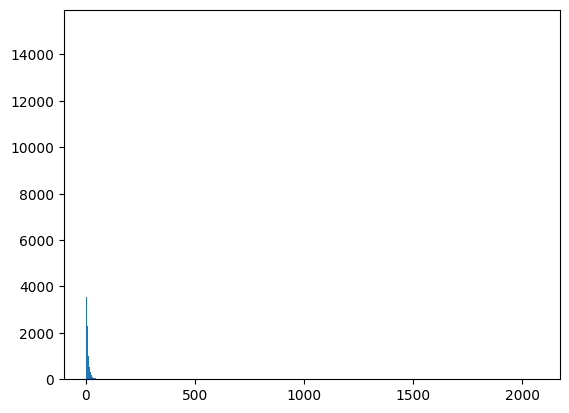

In [97]:
import matplotlib.pyplot as plt
plt.hist(i[1:], bins=1000)

In [243]:
import copy
all = []
indexes = []
for j, s in enumerate(S[1:]):
    vals = list(s)
    all.extend(vals)
    indexes.extend([j+1]*len(vals))
indexes = np.array(indexes)
nall = np.array(copy.deepcopy(all))

In [214]:
np.max(indexes)

30130

In [110]:
len(list(S[0]))

177759

In [180]:
len(all) # 271806, 256923

256923

In [241]:
with open("merged", "rb") as f:
    merged = pickle.load(f)

In [238]:
len(i)

28840

In [244]:
index = 0
fullNodes = list(S[index])
found = 1

while found > 0:
    df1 = edges[(edges["u"].isin(fullNodes) & edges["v"].isin(all))]
    df2 =  edges[(edges["u"].isin(all) & edges["v"].isin(fullNodes))]
    

    found = len(df1.index)+len(df2.index)
    if found > 0:
        df3 = pd.concat([df1, df2])
        df3 = df3.drop_duplicates(subset=["u", "v"])
        df3 = df3[["u", "v", "min_time", "length", "maxspeed", "name", "id"]]
        print(len(merged.index))
        merged = pd.concat([merged, df3])

        merged = merged.drop_duplicates(subset=["u", "v"])
        print(len(merged.index))

    valids = list(df1["v"])
    valids.extend(list(df2["u"]))
    inds = indexes[np.isin(nall, valids)]
    valids2 = nall[np.isin(indexes, inds)]
    fullNodes.extend(valids)
    fullNodes.extend(valids2)
    

    all = list(set(all)-set(fullNodes))
    print(found, len(all))

    
#df = df[["u", "v", "min_time", "length", "maxspeed", "name", "id"]]


421523
422390
867 259258
422390
422713
323 255282
422713
422842
129 253468
422842
422890
48 252870
422890
422919
29 252592
422919
422927
8 252521
422927
422929
2 252502
422929
422930
1 252496
422930
422931
1 252492
0 252492


In [252]:
merged = merged[merged["u"].isin(list(S[0])) | merged["v"].isin(list(S[0]))]

In [245]:
merged

,index,u,v,min_time,length,maxspeed,name,id,group
0,0.0,275999,3173036208,0.000110,4.409,40.0,Sandakerveien,1858,NaN
1,1.0,3173036208,1348289651,0.000098,3.914,40.0,Sandakerveien,1858,NaN
2,4.0,70954565,275998,0.000509,20.373,40.0,Sandakerveien,1858,NaN
3,7.0,79473,3441703623,0.000298,8.942,30.0,Markveien,17834,NaN
4,9.0,3441700286,647765,0.001737,52.109,30.0,Markveien,17834,NaN
...,...,...,...,...,...,...,...,...,...
1167342,NaN,3652983556,3652983562,0.000352,17.617,50.0,None,360742786,NaN
296890,NaN,7913600527,7913600526,0.000141,11.318,80.0,Homledalsvegen,59312803,NaN
919779,NaN,2574701002,7923456776,0.000146,7.288,50.0,None,251217073,NaN
296887,NaN,2879646198,7913600520,0.000063,5.005,80.0,Homledalsvegen,59312803,NaN


In [151]:
merged

,index,u,v,min_time,length,maxspeed,name,id,group
0,0.0,275999,3173036208,0.000110,4.409,40.0,Sandakerveien,1858,NaN
1,1.0,3173036208,1348289651,0.000098,3.914,40.0,Sandakerveien,1858,NaN
2,4.0,70954565,275998,0.000509,20.373,40.0,Sandakerveien,1858,NaN
3,7.0,79473,3441703623,0.000298,8.942,30.0,Markveien,17834,NaN
4,9.0,3441700286,647765,0.001737,52.109,30.0,Markveien,17834,NaN
...,...,...,...,...,...,...,...,...,...
98826,NaN,6343187723,6343187722,0.000532,26.611,50.0,Øvre Prinsdals vei,24594349,NaN
596945,NaN,1491224871,4891940153,0.000553,27.652,50.0,Bregneveien,135856456,NaN
667673,NaN,6080640,6080645,0.000704,21.109,30.0,Linneaveien,157609623,NaN
1404966,NaN,5160319696,5160319691,0.000418,20.876,50.0,Måltrostvegen,531618085,NaN


In [150]:
421523/1291847

0.32629483212795324

In [149]:
edges

,access,area,bicycle,bridge,busway,cycleway,est_width,foot,footway,highway,...,id,timestamp,version,tags,osm_type,geometry,u,v,length,min_time
0,None,None,None,None,None,None,None,None,None,tertiary,...,1858,1624552769,23,"{""maxspeed:type"":""sign"",""wikidata"":""Q11999365""}",way,"LINESTRING (10.76851 59.95286, 10.76846 59.95282)",275999,3173036208,4.409,0.000110
1,None,None,None,None,None,None,None,None,None,tertiary,...,1858,1624552769,23,"{""maxspeed:type"":""sign"",""wikidata"":""Q11999365""}",way,"LINESTRING (10.76846 59.95282, 10.76843 59.95279)",3173036208,1348289651,3.914,0.000098
2,None,None,None,None,None,None,None,None,None,tertiary,...,1858,1624552769,23,"{""maxspeed:type"":""sign"",""wikidata"":""Q11999365""}",way,"LINESTRING (10.76843 59.95279, 10.76831 59.95271)",1348289651,70954564,11.608,0.000290
3,None,None,None,None,None,None,None,None,None,tertiary,...,1858,1624552769,23,"{""maxspeed:type"":""sign"",""wikidata"":""Q11999365""}",way,"LINESTRING (10.76831 59.95271, 10.76817 59.95258)",70954564,70954565,16.221,0.000406
4,None,None,None,None,None,None,None,None,None,tertiary,...,1858,1624552769,23,"{""maxspeed:type"":""sign"",""wikidata"":""Q11999365""}",way,"LINESTRING (10.76817 59.95258, 10.76800 59.95242)",70954565,275998,20.373,0.000509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102116,None,None,None,None,None,None,None,None,None,service,...,1104127642,1665857342,1,None,way,"LINESTRING (11.48675 60.17742, 11.48644 60.17718)",5798536261,5798536262,31.800,0.000636
2102117,None,None,None,None,None,None,None,None,None,service,...,1104127642,1665857342,1,None,way,"LINESTRING (11.48644 60.17718, 11.48642 60.17711)",5798536262,5798536263,8.076,0.000162
2102118,None,None,None,None,None,None,None,None,None,service,...,1104127642,1665857342,1,None,way,"LINESTRING (11.48642 60.17711, 11.48651 60.17704)",5798536263,5798536264,8.760,0.000175
2102119,None,None,None,None,None,None,None,None,None,service,...,1104127643,1665857342,1,None,way,"LINESTRING (11.51122 60.18242, 11.51097 60.18244)",5798205776,5798205777,13.964,0.000279


In [120]:
merged = pd.concat([merged, df])

In [90]:
merged

,index,u,v,min_time,length,maxspeed,name,id,group
0,0.0,275999,3173036208,0.000110,4.409,40.0,Sandakerveien,1858,NaN
1,1.0,3173036208,1348289651,0.000098,3.914,40.0,Sandakerveien,1858,NaN
2,4.0,70954565,275998,0.000509,20.373,40.0,Sandakerveien,1858,NaN
3,7.0,79473,3441703623,0.000298,8.942,30.0,Markveien,17834,NaN
4,9.0,3441700286,647765,0.001737,52.109,30.0,Markveien,17834,NaN
...,...,...,...,...,...,...,...,...,...
2096712,NaN,10035901321,10035901320,0.000074,3.680,50.0,None,1095847195,NaN
2097714,NaN,10040469904,10040469903,0.000089,4.431,50.0,None,1096406802,NaN
2099890,NaN,10063657911,1370469871,0.000128,6.412,50.0,Blakerveien,1099230411,NaN
2099893,NaN,10063657910,2394473122,0.000111,5.535,50.0,Blakerveien,1099230411,NaN


In [66]:
for j in range(1,len(i)):
    df2 = edges[(edges["u"].isin(list(S[0])) & edges["v"].isin(list(S[j]))) | (edges["u"].isin(list(S[j])) & edges["v"].isin(list(S[0])))]
    df2 = df2[["u", "v", "min_time", "length", "maxspeed", "name", "id"]]
    merged = pd.concat([merged, df2])
    

KeyboardInterrupt: 

In [67]:
merged

,index,u,v,min_time,length,maxspeed,name,id,group
0,0.0,275999,3173036208,0.000110,4.409,40.0,Sandakerveien,1858,NaN
1,1.0,3173036208,1348289651,0.000098,3.914,40.0,Sandakerveien,1858,NaN
2,4.0,70954565,275998,0.000509,20.373,40.0,Sandakerveien,1858,NaN
3,7.0,79473,3441703623,0.000298,8.942,30.0,Markveien,17834,NaN
4,9.0,3441700286,647765,0.001737,52.109,30.0,Markveien,17834,NaN
...,...,...,...,...,...,...,...,...,...
1218415,NaN,106394,106392,0.004652,232.578,50.0,Ekebergveien,381103780,NaN
776212,NaN,5198725884,1285967812,0.000094,4.706,50.0,Ekebergveien,187998400,NaN
6729,NaN,2638447051,3165356333,0.000531,21.250,40.0,Stamhusveien,4297054,NaN
488840,NaN,1308201684,6779180695,0.000733,36.639,50.0,None,115907861,NaN


In [55]:
edges[edges["u"].isin(list(S[1634])) & edges["v"].isin(list(S[0]))]

,access,area,bicycle,bridge,busway,cycleway,est_width,foot,footway,highway,...,winter_road,id,timestamp,version,tags,osm_type,geometry,u,v,length
1050357,None,None,None,None,None,None,None,None,None,secondary,...,None,325812041,1606501418,3,None,way,"LINESTRING (10.49418 59.90045, 10.49421 59.90042)",3324213427,3324213424,3.15


In [57]:
Nedges[Nedges["u"] == 3324213427]

,index,u,v,min_time,length,maxspeed,name,id,group


In [30]:
a = np.array(edges[["u", "v"]])
a = a.flatten()
u, c = np.unique(a, return_counts=True)
edges["bullshit"] = edges["u"].isin(u[c <= 2]) & edges["v"].isin(u[c <= 2])
df = edges[edges["bullshit"] == True]
#edges = edges[edges["bullshit"] == False]
#edges = edges[["u", "v", "min_time", "length", "maxspeed", "name", "id"]].reset_index()

df = df.groupby("id").agg({"u" : "first", "v" : "last", "length" : "sum", "maxspeed" : "first", "name" : "first", "min_time" : "sum"}).reset_index()


In [32]:
df

,id,u,v,length,maxspeed,name,min_time
0,1858,1348289651,70954565,27.829,40,Sandakerveien,0.000696
1,17834,3441703623,3441700286,46.063,30,Markveien,0.001535
2,17836,1387801989,1469875874,90.252,30,Schous plass,0.003008
3,17837,25522272,4538519402,13.522,30,Nedre gate,0.000451
4,17839,8812799697,1387801957,83.492,30,Korsgata,0.002783
...,...,...,...,...,...,...,...
112197,1104122662,3451659251,3451659230,1036.113,50,Tronrudvegen,0.020722
112198,1104127640,6949789431,6949932798,60.636,50,Nordstusaga,0.001213
112199,1104127641,5798227419,5798227421,35.918,50,Frognerstrandvegen,0.000718
112200,1104127642,5798536261,5798536264,48.636,50,Hunstadvegen,0.000973


In [31]:
df = df[df["u"] != df["v"]]

,id,u,v,length,maxspeed,name,min_time
455,4309747,25298531,25298531,47.624,60,None,0.000794
558,4428230,27159955,27159955,48.962,50,None,0.000979
560,4428235,27160147,27160147,36.740,50,None,0.000735
648,4549940,18104206,18104206,134.076,50,None,0.002682
1025,4855787,31316019,31316019,50.186,60,None,0.000836
...,...,...,...,...,...,...,...
109934,1067085981,9798021214,9798021214,30.320,50,None,0.000606
109935,1067086867,9798024888,9798024888,25.095,50,None,0.000502
110369,1074778902,9857904050,9857904050,33.268,50,Strømsborgveien,0.000665
110726,1084074246,9934209422,9934209422,25.297,50,Drammensveien,0.000506


In [23]:
G = nx.from_pandas_edgelist(df, 'u', 'v', "min_time")
    
S = [G.subgraph(c).copy() for c in nx.connected_components(G.to_undirected())]
i = np.array([len(s.nodes) for s in S])

iter = 1
for j, s in enumerate(S):
    print(df[df["u"].isin(list(s.nodes)) | df["v"].isin(list(s.nodes))])
    degrees = np.array([[node, val] for (node, val) in s.degree()])
    fromTo = degrees[degrees[:, 1] == 1, 0]
    if len(fromTo) == 2:
        df.loc[df["u"].isin(list(s.nodes)) | df["v"].isin(list(s.nodes)), "group"] = iter
        if len(df.loc[df["u"] == fromTo[0]].index) > 0:
            df.loc[df["group"] == iter, "group_u"] = fromTo[0]
            df.loc[df["group"] == iter, "group_v"] = fromTo[1]
        else:
            df.loc[df["group"] == iter, "group_u"] = fromTo[1]
            df.loc[df["group"] == iter, "group_v"] = fromTo[0]

        if j%1000 == 0:
            print(j/len(S))
        iter += 1
    else:
        print("none")
        df.loc[df["u"].isin(list(s.nodes)) | df["v"].isin(list(s.nodes)), "group"] = np.nan

     id           u         v  length  maxspeed           name  min_time
0  1858  1348289651  70954565  27.829        40  Sandakerveien  0.000696
0.0
      id           u           v  length  maxspeed       name  min_time  \
1  17834  3441703623  3441700286  46.063        30  Markveien  0.001535   

   group  group_u  group_v  
1    NaN      NaN      NaN  
              id           u           v  length  maxspeed          name  \
2          17836  1387801989  1469875874  90.252        30  Schous plass   
51925  377899748  1469875874  9842873976   4.024        30  Schous plass   

       min_time  group  group_u  group_v  
2      0.003008    NaN      NaN      NaN  
51925  0.000134    NaN      NaN      NaN  
      id         u           v  length  maxspeed        name  min_time  group  \
3  17837  25522272  4538519402  13.522        30  Nedre gate  0.000451    NaN   

   group_u  group_v  
3      NaN      NaN  
      id           u           v  length  maxspeed      name  min_time  grou

KeyboardInterrupt: 

In [26]:
df = df[df["u"] != df["v"]]

In [28]:
G = nx.from_pandas_edgelist(df, 'u', 'v', "min_time")
    
S = [G.subgraph(c).copy() for c in nx.connected_components(G.to_undirected())]
i = np.array([len(s.nodes) for s in S])

In [22]:
import matplotlib.pyplot as plt
for ind in np.where(i>500)[0]:
#for ind in range(0,len(i)):
    no = list(S[ind])
    print(len(no))
    nodes[nodes["id"].isin(no)][["lat", "lon"]]

    a = np.array(nodes[nodes["id"].isin(no)][["lat", "lon"]])
    plt.scatter(a[:, 0], a[:, 1], s=0.01)
plt.show()

,id,u,v,length,maxspeed,name,min_time
0,1858,1348289651,70954565,27.829,40,Sandakerveien,0.000696
1,17834,3441703623,3441700286,46.063,30,Markveien,0.001535
2,17836,1387801989,1469875874,90.252,30,Schous plass,0.003008
3,17837,25522272,4538519402,13.522,30,Nedre gate,0.000451
4,17839,8812799697,1387801957,83.492,30,Korsgata,0.002783
...,...,...,...,...,...,...,...
112197,1104122662,3451659251,3451659230,1036.113,50,Tronrudvegen,0.020722
112198,1104127640,6949789431,6949932798,60.636,50,Nordstusaga,0.001213
112199,1104127641,5798227419,5798227421,35.918,50,Frognerstrandvegen,0.000718
112200,1104127642,5798536261,5798536264,48.636,50,Hunstadvegen,0.000973


In [ ]:
df2 = df.groupby("id").agg({"u" : "first", "v" : "last", "length" : "sum", "maxspeed" : "first", "name" : "first", "min_time" : "sum"}).reset_index()
df2[df2["length"] > np.sqrt(2)*1000]

In [35]:
u, c = np.unique(a, return_counts=True)

In [36]:
len(u)

423402

In [38]:
u[np.random.randint(0,len(u))]

3523116246

In [37]:
len(list(G.nodes))

423402

In [4]:
index = np.argsort(-c)
u = u[index]
c = c[index]

In [ ]:
len(u[c < 3])/len(u)

In [ ]:
edges[edges["u"].isin(u[c < 3]) | edges["v"].isin(u[c < 3])]

In [ ]:
plt.plot(c[0:1000])

In [ ]:
len(c[c > 2])/len(c)

In [5]:
edges["bullshit"] = edges["u"].isin(u[c <= 2]) & edges["v"].isin(u[c <= 2])
n = list(set(edges["v"].tolist())-set(edges["u"].tolist()))
#edges["bullshit"] = ~edges["v"].isin(n)


In [6]:
edges = edges[edges["bullshit"] == False]

In [8]:
import pickle
with open("df2", "rb") as w:
    df2 = pickle.load(w)

In [133]:
import pickle
with open("merged", "rb") as w:
    merged = pickle.load(w)

In [2]:
merged

,u,v,min_time,length,maxspeed,id,name
9,3441700286,647765,0.001737,52.109,30.0,17834,Markveien
10,647765,8496457084,0.000166,4.988,30.0,17834,Markveien
11,8496457084,106196,0.000369,11.067,30.0,17834,Markveien
14,1510359312,659974,0.002338,70.142,30.0,17837,Nedre gate
15,659974,25522272,0.001291,38.741,30.0,17837,Nedre gate
...,...,...,...,...,...,...,...
94726,5654083601,5654083604,0.000882,44.102,50.0,1103903027,Snekkervegen
94727,3338631825,3338631656,0.007320,366.016,50.0,1104113983,None
94728,4235384808,4235384812,0.002741,137.063,50.0,1104113984,None
94729,4921920959,3337658876,0.001798,89.910,50.0,1104122661,Kjærnsmovegen


In [7]:
edges

,access,area,bicycle,bridge,busway,cycleway,est_width,foot,footway,highway,...,timestamp,version,tags,osm_type,geometry,u,v,length,min_time,bullshit
9,None,None,None,None,None,None,None,None,None,residential,...,1660936249,9,"{""wikidata"":""Q19381098""}",way,"LINESTRING (10.75698 59.92780, 10.75701 59.92734)",3441700286,647765,52.109,0.001737,False
10,None,None,None,None,None,None,None,None,None,residential,...,1660936249,9,"{""wikidata"":""Q19381098""}",way,"LINESTRING (10.75701 59.92734, 10.75702 59.92729)",647765,8496457084,4.988,0.000166,False
11,None,None,None,None,None,None,None,None,None,residential,...,1660936249,9,"{""wikidata"":""Q19381098""}",way,"LINESTRING (10.75702 59.92729, 10.75703 59.92719)",8496457084,106196,11.067,0.000369,False
14,None,None,None,None,None,None,None,None,None,residential,...,1663083743,10,"{""wikidata"":""Q11991067""}",way,"LINESTRING (10.75452 59.92076, 10.75452 59.92012)",1510359312,659974,70.142,0.002338,False
15,None,None,None,None,None,None,None,None,None,residential,...,1663083743,10,"{""wikidata"":""Q11991067""}",way,"LINESTRING (10.75452 59.92012, 10.75451 59.91978)",659974,25522272,38.741,0.001291,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102087,None,None,None,None,None,None,None,None,None,unclassified,...,1665854981,1,None,way,"LINESTRING (11.38210 60.01075, 11.38210 60.01053)",3451687516,3451652378,25.421,0.000508,False
2102107,None,None,None,None,None,None,None,None,None,unclassified,...,1665854981,1,None,way,"LINESTRING (11.37874 60.00724, 11.37771 60.00709)",3451659230,3451659258,59.405,0.001188,False
2102111,None,None,None,None,None,None,None,None,None,service,...,1665857342,1,None,way,"LINESTRING (11.50425 60.26295, 11.50421 60.26290)",6949932796,6949932801,5.713,0.000114,False
2102112,None,None,None,None,None,None,None,None,None,service,...,1665857342,1,None,way,"LINESTRING (11.50421 60.26290, 11.50418 60.26287)",6949932801,6949932797,3.484,0.000070,False


In [104]:
edges[["u", "v", "min_time", "length", "maxspeed", "name", "id", "name"]].reset_index()

,index,u,v,min_time,length,maxspeed,name,id,name
0,7,79473,3441703623,0.000298,8.942,30,Markveien,17834,Markveien
1,8,3441703623,3441700286,0.001535,46.063,30,Markveien,17834,Markveien
2,16,25522272,4538519402,0.000451,13.522,30,Nedre gate,17837,Nedre gate
3,17,106171,8706650760,0.000146,4.370,30,Øvre gate,17838,Øvre gate
4,22,8812799697,1468085380,0.000163,4.896,30,Korsgata,17839,Korsgata
...,...,...,...,...,...,...,...,...,...
954064,2102115,5798227420,5798227421,0.000456,22.791,50,Frognerstrandvegen,1104127641,Frognerstrandvegen
954065,2102116,5798536261,5798536262,0.000636,31.800,50,Hunstadvegen,1104127642,Hunstadvegen
954066,2102117,5798536262,5798536263,0.000162,8.076,50,Hunstadvegen,1104127642,Hunstadvegen
954067,2102118,5798536263,5798536264,0.000175,8.760,50,Hunstadvegen,1104127642,Hunstadvegen


In [94]:
edges["u"].dtype

dtype('int64')

In [10]:
df3 = df2.drop(columns="u")

In [11]:
df3["u"] = df3["group_u"].astype("int64")
df3["v"] = df3["group_v"].astype("int64")

In [12]:
import pandas as pd
merged = pd.concat([edges, df3])

In [111]:
import pickle
with open("merged", "wb") as w:
    pickle.dump(merged, w)

In [13]:
merged = merged[["u", "v", "min_time", "length", "maxspeed", "id", "name"]]

In [127]:
merged["min_time"].describe()

count    1.048800e+06
mean     5.379535e-04
std      2.423794e-03
min      2.200000e-07
25%      1.226400e-04
50%      2.231000e-04
75%      4.229800e-04
max      2.657657e-01
Name: min_time, dtype: float64

<AxesSubplot: ylabel='Frequency'>

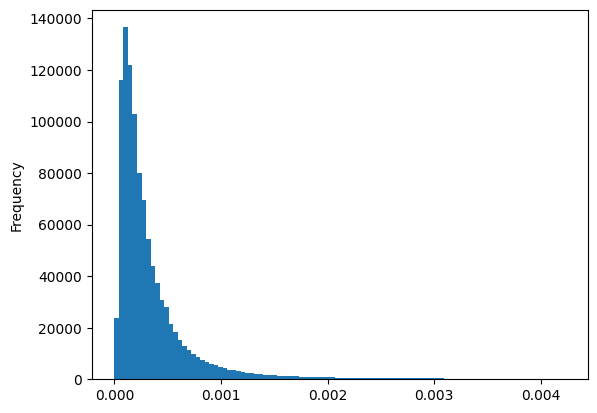

In [132]:
merged[merged["min_time"] < 4.229800e-03]["min_time"].plot.hist(bins=100)

In [3]:
nodes = nodes[(nodes["id"].isin(merged["u"])) | (nodes["id"].isin(merged["v"]))]

In [142]:
import geopandas
gdf = geopandas.GeoDataFrame(merged)

In [144]:
#G = fp.to_graph(nodes, gdf, force_bidirectional=True, network_type="driving+service", retain_all=True, graph_type="networkx")

AttributeError: You are calling a geospatial method on the GeoDataFrame, but the active geometry column ('geometry') is not present. 
There are no existing columns with geometry data type. You can add a geometry column as the active geometry column with df.set_geometry. 

In [149]:
import networkx as nx
G = nx.DiGraph()
G.add_nodes_from(np.array(nodes["id"]))

In [151]:
nx.__version__

'2.8.7'

In [4]:
import networkx as nx
G = nx.from_pandas_edgelist(merged, 'u', 'v', "min_time")

In [55]:
import networkx as nx
G = nx.from_pandas_edgelist(edges, 'u', 'v')

In [5]:
G = G.to_undirected()

In [32]:
len(list(G.nodes))

423402

,u,v,min_time,length,maxspeed,id,name
9,3441700286,647765,0.001737,52.109,30.0,17834,Markveien
10,647765,8496457084,0.000166,4.988,30.0,17834,Markveien
11,8496457084,106196,0.000369,11.067,30.0,17834,Markveien
14,1510359312,659974,0.002338,70.142,30.0,17837,Nedre gate
15,659974,25522272,0.001291,38.741,30.0,17837,Nedre gate
...,...,...,...,...,...,...,...
94726,5654083601,5654083604,0.000882,44.102,50.0,1103903027,Snekkervegen
94727,3338631825,3338631656,0.007320,366.016,50.0,1104113983,None
94728,4235384808,4235384812,0.002741,137.063,50.0,1104113984,None
94729,4921920959,3337658876,0.001798,89.910,50.0,1104122661,Kjærnsmovegen


In [54]:
n = list(G.nodes)

In [55]:
len(n)

423402

In [58]:
print(n[np.random.randint(0,423402)], n[np.random.randint(0,423402)])

5122802542 2387157743


In [81]:
nx.algorithms.shortest_path(G, n[np.random.randint(0,423402)], n[np.random.randint(0,423402)], weight="min_time")

NetworkXNoPath: No path between 8208689291 and 3700138787.

In [60]:
nx.write_edgelist(G, "fullAdj")

KeyboardInterrupt: 

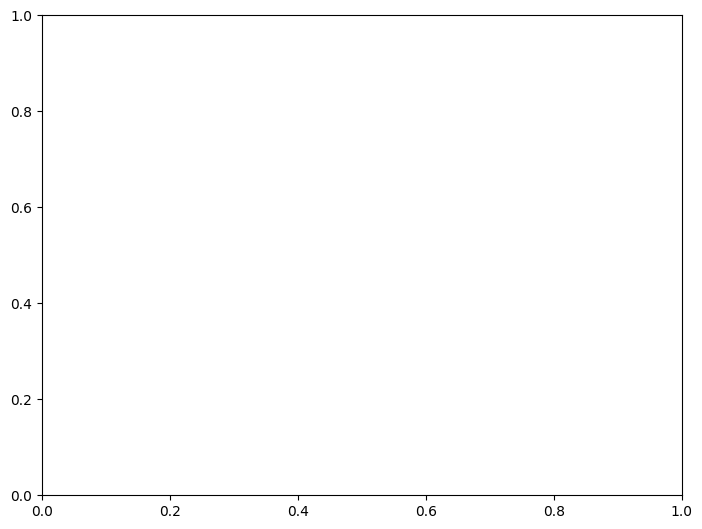

In [82]:
nx.draw(G, node_size=0.1)

In [89]:
df2["group_v"].astype("int64")

0        3441700286
1        4538519402
2        8706650760
3        1387801957
4        8706650763
            ...    
94726    5654083604
94727    3338631656
94728    4235384812
94729    3337658876
94730    3451659230
Name: group_v, Length: 94731, dtype: int64

In [ ]:
df3["u"] = df3["group_u"]

In [6]:
edges["bullshit"].value_counts(normalize=True) # 76%

True     0.760141
False    0.239859
Name: bullshit, dtype: float64

In [6]:
df = edges[edges["bullshit"] == True]
#df = edges
df = df.groupby("id").agg({"u" : "first", "v" : "last", "length" : "sum", "maxspeed" : "first", "name" : "first"}).reset_index()
d = np.array(df[["u", "v"]])

In [122]:
import pickle
with open("merged", "wb") as w:
    pickle.dump(merged, w)

In [62]:
df2

,group,group_u,group_v,min_time,length,name,maxspeed,u
0,1.0,7.947300e+04,3.441700e+09,0.001834,55.005,Markveien,30.0,1
1,2.0,2.552227e+07,4.538519e+09,0.000451,13.522,Nedre gate,30.0,1
2,3.0,1.061710e+05,8.706651e+09,0.000146,4.370,Øvre gate,30.0,1
3,4.0,8.812800e+09,1.387802e+09,0.002783,83.492,Korsgata,30.0,1
4,5.0,8.706651e+09,8.706651e+09,0.002677,80.302,Stolmakergata,30.0,1
...,...,...,...,...,...,...,...,...
94726,94727.0,5.654084e+09,5.654084e+09,0.000882,44.102,Snekkervegen,50.0,1
94727,94728.0,3.338632e+09,3.338632e+09,0.007320,366.016,None,50.0,1
94728,94729.0,4.235385e+09,4.235385e+09,0.002741,137.063,None,50.0,1
94729,94730.0,4.921921e+09,3.337659e+09,0.001798,89.910,Kjærnsmovegen,50.0,1


In [68]:
df2["u"].sum()-len(df2.index)

15754

In [2]:
import pickle
with open("df", "rb") as w:
    df = pickle.load(w)

In [3]:
import numpy as np
#df = df.groupby("id").agg({"u" : "first", "v" : "last", "length" : "sum", "maxspeed" : "first", "name" : "first"}).reset_index()
d = np.array(df[["u", "v"]])

In [ ]:
df.groupby("id")["u"].count().plot.hist(bins=100)

In [ ]:
df[["u", "v", "id"]]

In [ ]:
df["length"].plot.hist(bins=1000)

In [ ]:
nx.

In [ ]:
edges["id"].nunique()

In [ ]:
list(set(edges["v"].tolist())-set(edges["u"].tolist()))

In [1]:
yo = np.zeros(len(d))
i = 1
lengthSums = []
edg = []

def backward_traverse(val, k, d, i):
    global yo

    #path.append(val)
    #print(k)
    #if np.any(yo[d[:, (1-k)] == val] == 0 ):
    if np.any(d[:, (1-k)] == val):
        if not np.all(yo[d[:, (1-k)] == val] == i):
            yo[d[:, (1-k)] == val] = i
            v = d[d[:, (1-k)] == val]
            #print(v, val)
            if len(v) > 0:
                for g in range(v.shape[0]):
                    backward_traverse(v[g,k], 1-k, d, i)
        else:
            return
    return
for iter, el in enumerate(d):
    if yo[iter] == 0:
        blanks = [0,0]
        v = []
        yo[iter] = i

        path = []
        for k, val in enumerate(el): # foring through backwards / forwards direction
            blanks[k] = val
            path = []
            v = d[d[:, (1-k)] == val] # retrieving edges which connects to this value
            for g in range(v.shape[0]):
                backward_traverse(v[g,k], k, d, i)

            #print(path)
            if len(path) > 1:
                blanks[k] = path[-1] #setting start indice of part
                #print(edges[(edges["u"].isin(path)) | (edges["v"].isin(path))][["name", "id"]])

        #print(blanks)
        #length = edges[(edges["u"].isin(path)) | (edges["v"].isin(path))]["length"].sum()
        #if length > 1000:
            
        #print(edges[(edges["u"].isin(path)) | (edges["v"].isin(path))][["u", "v", "id"]])
        #break

        i += 1
        if iter%100 == 0:
            print(iter*100/len(d), iter, i, iter-i)


NameError: name 'np' is not defined

In [ ]:
df["group_2"] = yo

In [ ]:
u,c = np.unique(yo, return_counts=True)

In [18]:
df = df[df["u"] != df["v"]]

In [ ]:
u[c>1]

In [ ]:
df[["group", "group_2"]].plot.scatter("group", "group_2")

In [ ]:
df.groupby("group_2")["length"].sum().sort_values(ascending=False)

In [42]:
df[df["group"] == 12214.0]

,id,u,v,length,maxspeed,name,group,group_u,group_v
13436,72355536,8278461143,859446787,639.316,50,None,12214.0,3.830665e+09,1.895245e+09
13448,72355616,8278461143,1895245394,194.960,50,None,12214.0,3.830665e+09,1.895245e+09
14231,81660650,859446279,1885658583,141.173,50,None,12214.0,3.830665e+09,1.895245e+09
14234,81660656,8278402276,8278461123,493.111,50,None,12214.0,3.830665e+09,1.895245e+09
19401,116405099,911790998,859445213,75.075,50,None,12214.0,3.830665e+09,1.895245e+09
19402,116405104,8278402276,859445756,157.428,50,None,12214.0,3.830665e+09,1.895245e+09
29157,178191708,859445756,859446279,65.377,50,None,12214.0,3.830665e+09,1.895245e+09
29158,178191710,1885658583,3830664658,39.667,50,None,12214.0,3.830665e+09,1.895245e+09
31426,195032118,859446787,8278461142,368.472,50,None,12214.0,3.830665e+09,1.895245e+09
32792,217274138,2265539879,859445375,59.071,50,None,12214.0,3.830665e+09,1.895245e+09


In [38]:
edg = np.array(df[df["group"] == 12214.0][["u", "v"]])
edg

array([[8278461143,  859446787],
       [8278461143, 1895245394],
       [ 859446279, 1885658583],
       [8278402276, 8278461123],
       [ 911790998,  859445213],
       [8278402276,  859445756],
       [ 859445756,  859446279],
       [1885658583, 3830664658],
       [ 859446787, 8278461142],
       [2265539879,  859445375],
       [ 859445375, 2265539886],
       [8278461138,  859446370],
       [2265539904, 2265539899],
       [ 859446370, 8278461137],
       [2265539886,  911790825],
       [ 859445213, 2265539904],
       [ 859444896,  911790825],
       [2265539899,  859444896],
       [8278461126, 2265539879],
       [8278461123, 8278461120],
       [8278461120, 8278461125],
       [8278461125, 8278461126],
       [5924562050,  911790998],
       [8278461137, 5924562050],
       [8278461140, 8278461138],
       [8278461142, 8278461140]], dtype=int64)

In [ ]:
edges.groupby("id")["length"].sum().sort_values()

In [39]:
import networkx as nx
G = nx.Graph()
#G.add_edges_from(np.array(df[["u", "v"]]))
G.add_edges_from(edg)

In [140]:
import networkx as nx
G = nx.Graph()
#G.add_edges_from(np.array(df[["u", "v"]]))
G.add_edges_from(np.array(edges[[""]]))

array([1042886,      15,     107, ...,       5,       4,       5])

In [147]:
nx.draw(S[np.random.randint(0,len(i)-1)], node_size=10)

IndexError: list index out of range

In [131]:
np.average(i)

236.80595306239266

In [11]:
G = nx.from_pandas_edgelist(edges, 'u', 'v')

In [ ]:
list(nx.isolates(G))

In [12]:
import networkx as nx
import numpy as np
S = [G.subgraph(c).copy() for c in nx.connected_components(G.to_undirected())]
i = np.array([len(s.nodes) for s in S])

In [13]:
np.max(i)

357

In [241]:
i = np.array([len(s.nodes) for s in S])

In [160]:
vals = []
x = np.linspace(0,np.max(i))
for z in x:
    v = len(i[i>z])/len(i)
    vals.append(v)

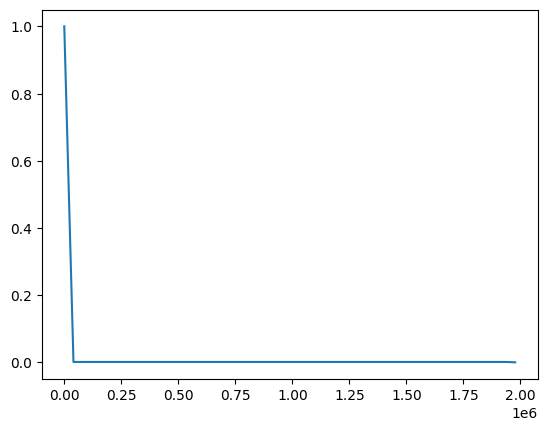

In [161]:
plt.plot(x, vals)

(array([928.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2.00000000e+00, 1.97740600e+04, 3.95461200e+04, 5.93181800e+04,
        7.90902400e+04, 9.88623000e+04, 1.18634360e+05, 1.38406420e+05,
        1.58178480e+05, 1.77950540e+05, 1.97722600e+05, 2.17494660e+05,
        2.37266720e+05, 2.57038780e+05, 2.76810840e+05, 2.96582900e+05,
        3.16354960e+05, 3.3612

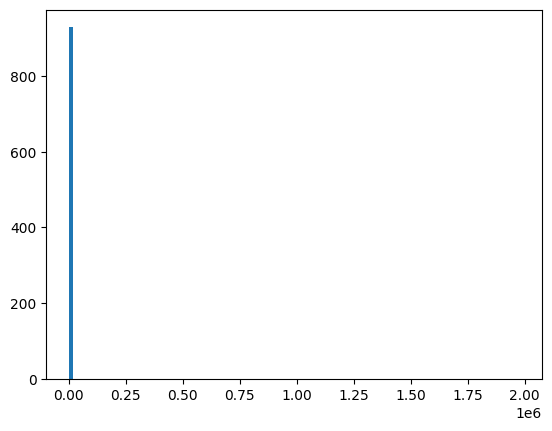

In [169]:
import matplotlib.pyplot as plt

plt.hist(i, bins=100)


In [237]:
print(i)

[1977208       8      15      13       5    6957      48    2090       2
    1299      29     606       2     115       2      65      11      73
     647       2     836       3      14      11     834     871      10
       2       4       2       2       2       2       2       2       2
       4       2       2       2       2       2      16      18       7
      15     201      10      13      33     270     190       2       3
      13       7      29       2       6       2      19      36       3
       5       5      13      17       2       5       2       3       5
       4       9       6       5       5      59       5       2      33
       2       8      16       2     226     338     688       4      26
       2      14       2      29     125     352       2       3      10
      10       5       2       2       4       2       2       2       2
       2       2       2       2       2       2       2       2       2
       2       2       2       2     147     373   

(array([   0, 1600], dtype=int64),)

In [222]:
np.argmax(i[1:])

4

6766


,lat,lon
38594,59.779562,10.442948
38595,59.779487,10.442870
38606,59.778808,10.441312
38941,59.778607,10.441061
38942,59.778595,10.441191
...,...,...
2002407,59.830010,10.402458
2002408,59.826513,10.400136
2002409,59.826548,10.400276
2002410,59.826584,10.400173


In [287]:
no2 = list(S[0])
print(len(no))

6766


In [268]:
np.sum(i[1:])

340000

In [277]:
nodes["lat"].min()

59.4517454

In [8]:
for ind in np.where(i>200)[0]:
    no = list(S[ind])
    print(len(no))
    nodes[nodes["id"].isin(no)][["lat", "lon"]]
    break

83402


188402


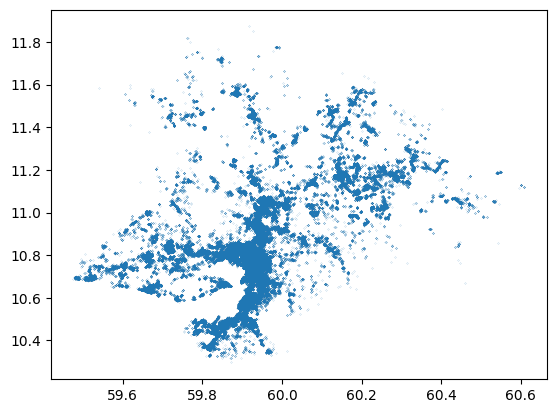

In [249]:
import matplotlib.pyplot as plt
for ind in np.where(i>1000)[0]:
#for ind in range(0,len(i)):
    no = list(S[ind])
    print(len(no))
    nodes[nodes["id"].isin(no)][["lat", "lon"]]

    a = np.array(nodes[nodes["id"].isin(no)][["lat", "lon"]])
    plt.scatter(a[:, 0], a[:, 1], s=0.01)
plt.show()

In [250]:
np.max(i[1:])

841

In [15]:
len(i)

59536

In [16]:
np.sum(i)

379255

In [19]:
edges[edges["length"] > 1000]

,index,u,v,min_time,length,maxspeed,name,id


In [48]:
bins = np.linspace(0, np.quantile(c, q=0.95), 1000)
binar = np.digitize(c, bins=bins)
u, co = np.unique(binar, return_counts=True)
co = co/co.sum()

In [28]:
G = S[0]

In [53]:
nx.write_edgelist(G, "adj5")

In [31]:
import geopandas as gpd
final = gpd.read_file("osm_zones.geojson")

In [35]:
len(set(list(final["id"]))-set(list(G)))

1032458

In [41]:
len(set(list(G))-set(list(final["id"])))

5005

In [37]:
len(list(final["id"]))

1148835

In [45]:
sFinal = final[final["id"].isin(list(G))]

In [46]:
sFinal

,lon,lat,tags,timestamp,version,changeset,id,index_right,geometry
6,10.756958,59.928298,{'highway': 'traffic_signals'},1607449171,4,95503095,79473,665.0,POINT (10.75696 59.92830)
8,10.756984,59.927804,None,1428353772,1,30026366,3441700286,664.0,POINT (10.75698 59.92780)
9,10.757013,59.927335,None,1615197647,5,100625984,647765,664.0,POINT (10.75701 59.92734)
10,10.757018,59.927291,"{'crossing': 'marked', 'highway': 'crossing'}",1615197647,1,100625984,8496457084,664.0,POINT (10.75702 59.92729)
11,10.757028,59.927191,None,1615197647,4,100625984,106196,664.0,POINT (10.75703 59.92719)
...,...,...,...,...,...,...,...,...,...
1148463,11.872780,59.918023,None,1519654616,1,56691903,5437739958,5394.0,POINT (11.87278 59.91802)
1148628,10.855435,60.543653,None,1598019048,1,89750653,7832656586,4869.0,POINT (10.85543 60.54365)
1148683,10.763252,60.314073,None,1599143955,2,90368403,4244969838,4410.0,POINT (10.76325 60.31407)
1148720,11.487976,60.402999,None,1512051135,1,54205868,5255847919,5898.0,POINT (11.48798 60.40300)


<AxesSubplot: xlabel='index_right'>

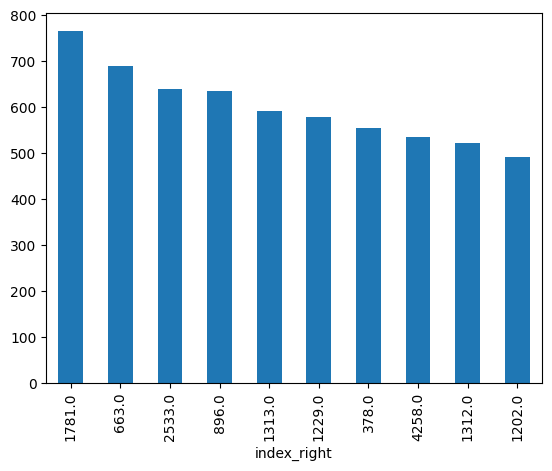

In [52]:
sFinal.groupby("index_right")["id"].count().sort_values(ascending=False).head(10).plot.bar()

In [42]:
len(list(G))

121382

In [19]:
nodes[nodes["id"].isin(list(S[0]))].index

Int64Index([      8,       9,      11,      12,      13,      14,      18,
                 19,      20,      21,
            ...
            2010434, 2010435, 2010436, 2010438, 2010439, 2010441, 2010520,
            2010539, 2010594, 2010595],
           dtype='int64', length=83402)

In [21]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

target = np.array(nodes[nodes["id"].isin(list(S[0]))][["lat", "lon"]])
ids = np.array(nodes[nodes["id"].isin(list(S[0]))].index)

nbrs = NearestNeighbors(n_neighbors=1).fit(target)

for ind in np.where(i>100)[0][1:]:
    no = list(S[ind])

    x = np.array(nodes[nodes["id"].isin(no)][["lat", "lon"]])
    idx = np.array(nodes[nodes["id"].isin(no)].index)

    distances, indices = nbrs.kneighbors(x, 1, return_distance=True)
    u,c = np.unique(indices, return_counts=True)
    c = c/c.sum()

    k = np.argmin(distances[indices == u[np.argmax(c)]])
    idT = nodes.iloc[ids[np.argmax(c)]]["id"]
    idF = nodes.iloc[idx[k]]["id"]
    G.add_edge(idF, idT)

In [22]:
nx.write_adjlist(G, "adj5")

In [89]:
np.argsort(c)[::-1]

array([11,  8, 22,  4,  9, 18, 19, 13, 16, 20,  1,  5, 15,  3, 21, 26, 14,
       23, 28,  0, 12,  2,  6, 27, 17,  7, 10, 24, 25], dtype=int64)

In [84]:
c[c<]

array([2.54524887e-03, 7.91855204e-03, 2.26244344e-03, 4.52488688e-03,
       6.67420814e-02, 5.65610860e-03, 1.97963801e-03, 8.48416290e-04,
       2.34445701e-01, 3.59162896e-02, 2.82805430e-04, 4.32126697e-01,
       2.26244344e-03, 1.61199095e-02, 3.39366516e-03, 5.37330317e-03,
       9.89819005e-03, 1.41402715e-03, 2.82805430e-02, 2.12104072e-02,
       7.91855204e-03, 3.67647059e-03, 9.38914027e-02, 2.82805430e-03,
       2.82805430e-04, 2.82805430e-04, 3.39366516e-03, 1.97963801e-03,
       2.54524887e-03])

(array([5., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.0001478 , 0.00018179, 0.00021578, 0.00024978, 0.00028377,
        0.00031777, 0.00035176, 0.00038575, 0.00041975, 0.00045374,
        0.00048773, 0.00052173, 0.00055572, 0.00058971, 0.00062371,
        0.0006577 , 0.00069169, 0.00072569, 0.00075968, 0.00079367,
        0.00082767, 0.00086166, 0.00089565, 0.00092965, 0.00096364,
        0.00099764, 0.00103163, 0.00106562, 0.00109962, 0.00113361,
        0.0011676 , 0.0012016 , 0.00123559, 0.00126958, 0.00130358,
        0.00133757, 0.00137156, 0.00140556, 0.00143955, 0.00147354,
      

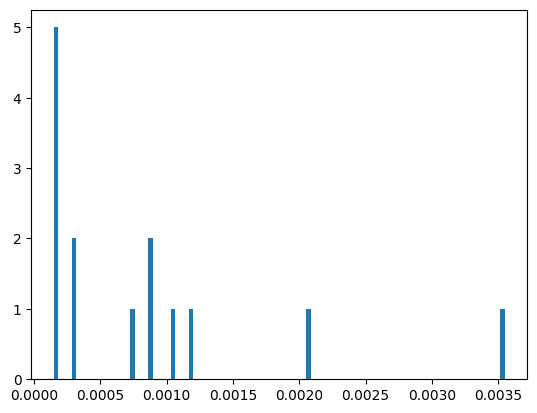

In [115]:
plt.hist(c[c<0.01], bins=100)

(array([172., 182., 114., 110.,  61.,  42.,  28.,  20.,  25.,  43.,  45.,
         35.,   7.,  31.,   4.,  40.,  39.,  96.,  17., 243., 242., 254.,
        148., 126.,  65.,  99.,  13.,  18.,  24.,   5.,   8.,  29.,   0.,
          1.,   0.,  33.,  50.,  19.,  18.,   1.,   3.,   5.,  28., 188.,
        213., 165.,  98.,  67.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,
          9.,  23.,   1.,   0.,   0.,   9.,   0.,   0.,   0.,   0.,   0.,
          0.,   4.,   1.,   0.,  26.,  33.,  53.,  65.,   1.,   0.,   1.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,  20.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          4.]),
 array([4.88773976e-05, 4.84167110e-03, 9.63446481e-03, 1.44272585e-02,
        1.92200522e-02, 2.40128459e-02, 2.88056396e-02, 3.35984333e-02,
        3.83912270e-02, 4.31840207e-02, 4.79768144e-02, 5.27696082e-02,
        5.75624019e-02, 6.23551956e-02, 6.71479893e-02, 7.19407830e-02,
        7.67335767e-02, 8.1526

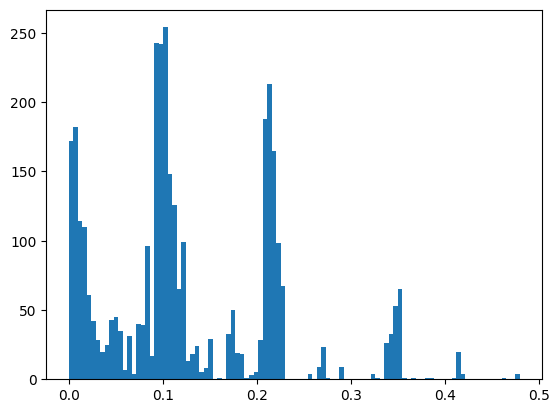

In [19]:
import matplotlib.pyplot as plt
plt.hist(distances, bins=100)

In [9]:
nodes["geometry"]

0          POINT (10.76851 59.95286)
1          POINT (10.76846 59.95282)
2          POINT (10.76843 59.95279)
3          POINT (10.76831 59.95271)
4          POINT (10.76817 59.95258)
                     ...            
2010740    POINT (10.92699 59.92123)
2010741    POINT (10.92705 59.92120)
2010742    POINT (10.60678 59.95802)
2010743    POINT (10.60652 59.95807)
2010744    POINT (10.60617 59.95814)
Name: geometry, Length: 2010745, dtype: geometry

In [127]:
import pandas as pd
df = pd.merge(nodes, merged, left_on="id", right_on="u")
df = pd.merge(nodes, df, left_on="id", right_on="v")

In [150]:
a = np.array(df[["lat_x", "lon_x"]])
b = np.array(df[["lat_y", "lon_y"]])
c = np.sqrt(np.power(a[:, 0]-b[:, 0], 2)+np.power(a[:, 1]-b[:, 1], 2))

In [119]:
np.quantile(c, q=0.95)

0.00190999932741494

In [129]:
np.mean(c[c< 0.00190999932741494])

0.0002914139579988944

In [151]:
np.std(c[c< 0.00190999932741494])

0.00031990360222099564

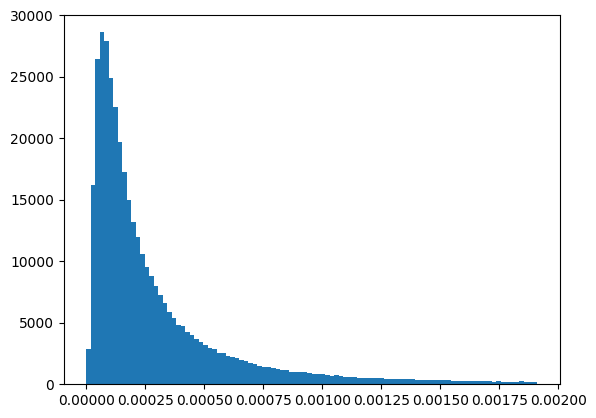

In [133]:
g = plt.hist(c[c< 0.00190999932741494], bins=100)

In [137]:
a,b,c = g

In [141]:
b[np.argmax(a)]

5.73954906286357e-05

In [98]:
np.std(c)

0.0026044107561702425

3536


c:\Users\jon39\Anaconda3\envs\pyrosm\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
c:\Users\jon39\Anaconda3\envs\pyrosm\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
c:\Users\jon39\Anaconda3\envs\pyrosm\lib\site-packages\geopandas\array.py:340: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


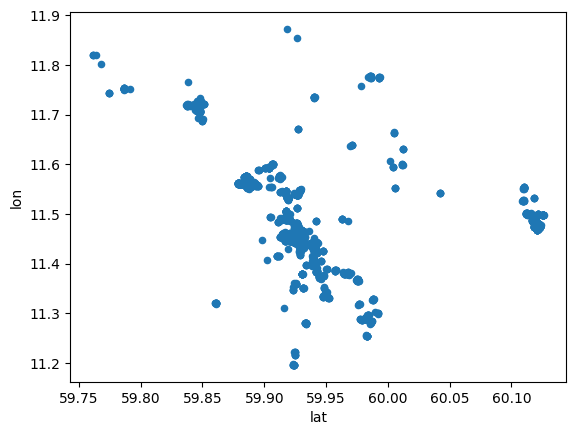

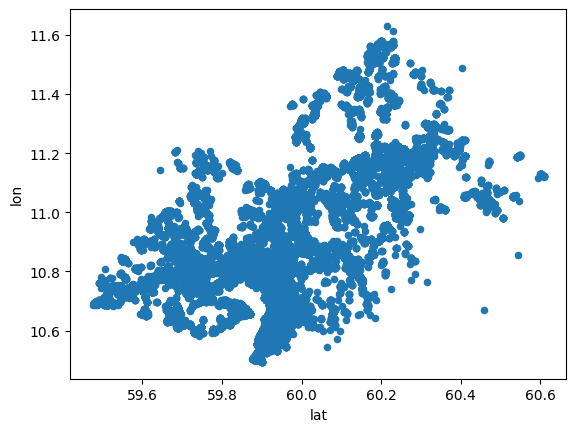

In [53]:
import geopandas as gpd
target = nodes[nodes["id"].isin(list(S[0]))]
target = target.to_crs(crs=4326)
for ind in np.where(i>1000)[0][1:]:
    no = list(S[ind])
    print(len(no))
    df = nodes[nodes["id"].isin(no)][[]]
    plt.scatter(df[:, 0], a[:, 1], s=0.01)

    #df = df.to_crs(crs=4326)
    #res = gpd.sjoin_nearest(df, target, how="right", distance_col="dist")
    #res[res["dist"] < 0.1]["dist"].plot.hist(bins=100)
    break

In [48]:
target = edges[edges["u"].isin(list(S[0])) | edges["v"].isin(list(S[0]))]["name"]
target = list(target)
#target = target.to_crs(crs=4326)
for ind in np.where(i>100)[0][1:]:
    no = list(S[ind])
    print(len(no))
    df = edges[edges["u"].isin(no) | edges["v"].isin(no)]["name"]
    df = list(df)
    print(set(target).intersection(df))
    break

433
{'None'}


In [62]:
target = edges[edges["u"].isin(list(S[0])) | edges["v"].isin(list(S[0]))]
target

,access,area,bicycle,bridge,busway,cycleway,est_width,foot,footway,highway,...,id,timestamp,version,tags,osm_type,geometry,u,v,length,min_time
7,None,None,None,None,None,None,None,None,None,residential,...,17834,1660936249,9,"{""wikidata"":""Q19381098""}",way,"LINESTRING (10.75696 59.92830, 10.75696 59.92822)",79473,3441703623,8.942,0.000298
8,None,None,None,None,None,None,None,None,None,residential,...,17834,1660936249,9,"{""wikidata"":""Q19381098""}",way,"LINESTRING (10.75696 59.92822, 10.75698 59.92780)",3441703623,3441700286,46.063,0.001535
9,None,None,None,None,None,None,None,None,None,residential,...,17834,1660936249,9,"{""wikidata"":""Q19381098""}",way,"LINESTRING (10.75698 59.92780, 10.75701 59.92734)",3441700286,647765,52.109,0.001737
10,None,None,None,None,None,None,None,None,None,residential,...,17834,1660936249,9,"{""wikidata"":""Q19381098""}",way,"LINESTRING (10.75701 59.92734, 10.75702 59.92729)",647765,8496457084,4.988,0.000166
11,None,None,None,None,None,None,None,None,None,residential,...,17834,1660936249,9,"{""wikidata"":""Q19381098""}",way,"LINESTRING (10.75702 59.92729, 10.75703 59.92719)",8496457084,106196,11.067,0.000369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101892,None,None,None,None,None,None,None,None,None,unclassified,...,1103659237,1665694848,1,"{""mtb:scale"":""0"",""source"":""survey""}",way,"LINESTRING (11.42264 60.30302, 11.42228 60.30300)",419836164,419836165,19.801,0.000396
2101963,None,None,None,None,None,None,None,None,None,service,...,1104012686,1665819288,1,None,way,"LINESTRING (11.57875 60.20029, 11.57908 60.20040)",5870942140,5870942141,21.947,0.000439
2101964,None,None,None,None,None,None,None,None,None,service,...,1104012686,1665819288,1,None,way,"LINESTRING (11.57908 60.20040, 11.57924 60.20041)",5870942141,5870942144,9.270,0.000185
2101965,None,None,None,None,None,None,None,None,None,service,...,1104012686,1665819288,1,None,way,"LINESTRING (11.57924 60.20041, 11.57948 60.20043)",5870942144,5870942142,13.542,0.000271


In [19]:
res["dist"]

8          0.0
9          0.0
11         0.0
12         0.0
13         0.0
          ... 
2010441    0.0
2010520    0.0
2010539    0.0
2010594    0.0
2010595    0.0
Name: dist, Length: 83402, dtype: float64

In [278]:
nodes[nodes["id"].isin(no)]["lat"].min()

59.4756873

In [274]:
nodes["lon"].min()

10.2961224

128540417

In [168]:
np.average(i[1:])

36.13900862068966

1195

In [88]:
np.average(i)

11.591480274865168

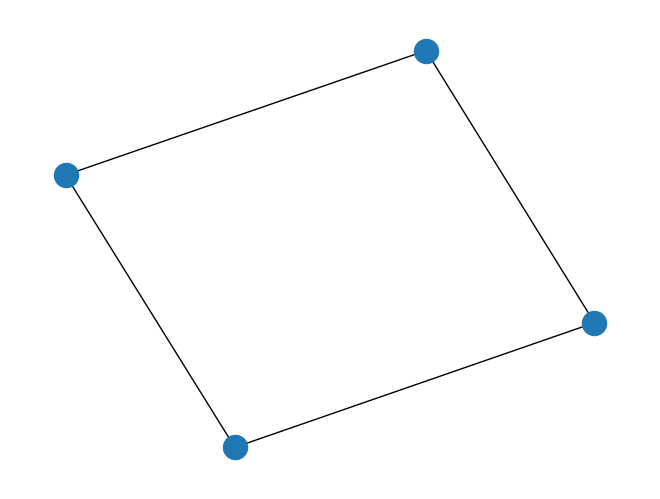

In [25]:
nx.draw(S[6027])

NameError: name 'edges' is not defined

In [29]:
iter = 1
for j, s in enumerate(S):
    #print(df[df["u"].isin(list(s.nodes)) | df["v"].isin(list(s.nodes))])
    degrees = np.array([[node, val] for (node, val) in s.degree()])
    fromTo = degrees[degrees[:, 1] == 1, 0]
    if len(fromTo) == 2:
        df.loc[df["u"].isin(list(s.nodes)) | df["v"].isin(list(s.nodes)), "group"] = iter
        if len(df.loc[df["u"] == fromTo[0]].index) > 0:
            df.loc[df["group"] == iter, "group_u"] = fromTo[0]
            df.loc[df["group"] == iter, "group_v"] = fromTo[1]
        else:
            df.loc[df["group"] == iter, "group_u"] = fromTo[1]
            df.loc[df["group"] == iter, "group_v"] = fromTo[0]

        if j%1000 == 0:
            print(j/len(S))
        iter += 1
    else:
        df.loc[df["u"].isin(list(s.nodes)) | df["v"].isin(list(s.nodes)), "group"] = np.nan
    #break

0.0
0.010555983659337295
0.02111196731867459
0.03166795097801189
0.04222393463734918
0.052779918296686476
0.06333590195602377
0.07389188561536107
0.08444786927469836
0.09500385293403565
0.10555983659337295
0.11611582025271025
0.12667180391204755
0.13722778757138485
0.14778377123072214
0.15833975489005944
0.1688957385493967
0.179451722208734
0.1900077058680713
0.2005636895274086
0.2111196731867459
0.2216756568460832
0.2322316405054205
0.2427876241647578
0.2533436078240951
0.2638995914834324
0.2744555751427697
0.285011558802107
0.2955675424614443
0.3061235261207816
0.3166795097801189
0.3272354934394562
0.3377914770987934
0.3483474607581307
0.358903444417468
0.3694594280768053
0.3800154117361426
0.3905713953954799
0.4011273790548172
0.4116833627141545
0.4222393463734918
0.4327953300328291
0.4433513136921664
0.4539072973515037
0.464463281010841
0.4750192646701783
0.4855752483295156
0.4961312319888529
0.5066872156481902
0.5172431993075275
0.5277991829668648
0.5383551666262021
0.548911150285

In [37]:
df.groupby("group")["u"].count().sort_values(ascending=False)

group
12214.0    26
877.0      19
876.0      18
4074.0     16
2145.0     16
           ..
35534.0     1
35533.0     1
35532.0     1
35531.0     1
94731.0     1
Name: u, Length: 94731, dtype: int64

In [46]:
df["min_time"] = (df["length"]/1000)/(df["maxspeed"])


C:\Users\jon39\AppData\Local\Temp\ipykernel_12208\921588101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["min_time"] = (df["length"]/1000)/(df["maxspeed"])


In [49]:
df.groupby("group")["maxspeed"].mean().sort_values()

group
37561.0     5.000000
92205.0     5.000000
15694.0     5.000000
84500.0     5.000000
8409.0      5.000000
             ...    
32184.0    80.000000
68051.0    80.000000
8904.0     82.500000
877.0      93.157895
876.0      94.444444
Name: maxspeed, Length: 94731, dtype: float64

,id,u,v,length,maxspeed,name,group,group_u,group_v,min_time
0,17834,79473,3441700286,55.005,30,Markveien,1.0,7.947300e+04,3.441700e+09,0.001834
1,17837,25522272,4538519402,13.522,30,Nedre gate,2.0,2.552227e+07,4.538519e+09,0.000451
2,17838,106171,8706650760,4.370,30,Øvre gate,3.0,1.061710e+05,8.706651e+09,0.000146
3,17839,8812799697,1387801957,83.492,30,Korsgata,4.0,8.812800e+09,1.387802e+09,0.002783
4,17841,8706650762,8706650763,80.302,30,Stolmakergata,5.0,8.706651e+09,8.706651e+09,0.002677
...,...,...,...,...,...,...,...,...,...,...
110685,1104122662,3451659251,3451659230,1036.113,50,Tronrudvegen,94731.0,3.451659e+09,3.451659e+09,0.020722
110686,1104127640,6949789431,6949932798,60.636,50,Nordstusaga,65760.0,6.949789e+09,6.949933e+09,0.001213
110687,1104127641,5798227419,5798227421,35.918,50,Frognerstrandvegen,54095.0,5.798227e+09,5.798227e+09,0.000718
110688,1104127642,5798536261,5798536264,48.636,50,Hunstadvegen,54102.0,5.798536e+09,5.798536e+09,0.000973


In [108]:
df2 = df.groupby("group").agg({"group_u": "first", "group_v" : "first", "min_time" : "sum", "length": "sum", "name" : "first", "maxspeed" : "mean", "u" : "count", "id" : "first"}).reset_index()

In [109]:
df2

,group,group_u,group_v,min_time,length,name,maxspeed,u,id
0,1.0,7.947300e+04,3.441700e+09,0.001834,55.005,Markveien,30.0,1,17834
1,2.0,2.552227e+07,4.538519e+09,0.000451,13.522,Nedre gate,30.0,1,17837
2,3.0,1.061710e+05,8.706651e+09,0.000146,4.370,Øvre gate,30.0,1,17838
3,4.0,8.812800e+09,1.387802e+09,0.002783,83.492,Korsgata,30.0,1,17839
4,5.0,8.706651e+09,8.706651e+09,0.002677,80.302,Stolmakergata,30.0,1,17841
...,...,...,...,...,...,...,...,...,...
94726,94727.0,5.654084e+09,5.654084e+09,0.000882,44.102,Snekkervegen,50.0,1,1103903027
94727,94728.0,3.338632e+09,3.338632e+09,0.007320,366.016,None,50.0,1,1104113983
94728,94729.0,4.235385e+09,4.235385e+09,0.002741,137.063,None,50.0,1,1104113984
94729,94730.0,4.921921e+09,3.337659e+09,0.001798,89.910,Kjærnsmovegen,50.0,1,1104122661


In [61]:
df2.sort_values(by="length", ascending=False)

,group,group_u,group_v,min_time,length,name,maxspeed,u
2401,2402.0,5.656044e+09,7.872898e+09,0.265766,20658.170,Skrukkelivegen,74.285714,7
21157,21158.0,7.904026e+09,1.601701e+09,0.174502,12325.596,Sockervägen,62.500000,4
20337,20338.0,2.894082e+09,1.502352e+09,0.240082,12004.111,Dragsjøvegen,50.000000,2
36759,36760.0,3.261645e+07,5.437740e+09,0.142424,11376.388,Vestmarkavegen,76.666667,6
3006,3007.0,6.943031e+09,6.900712e+09,0.133898,10711.832,Ringeriksveien,80.000000,4
...,...,...,...,...,...,...,...,...
6786,6787.0,6.022129e+09,6.022129e+09,0.000009,0.552,Johs. Haugeruds vei,60.000000,1
63210,63211.0,6.704031e+09,6.704031e+09,0.000010,0.508,None,50.000000,1
11749,11750.0,1.326587e+09,1.326587e+09,0.000010,0.485,Honnørplassen,50.000000,1
49110,49111.0,4.922875e+09,4.922875e+09,0.000009,0.450,None,50.000000,1


In [ ]:
df.groupby("group")["length"].sum().sort_values()

In [ ]:
df2 = df.groupby("group")["length"].sum().reset_index()
print(df2["length"].mean())
df2[df2["length"] > 1000]

In [ ]:
1582*100/82599

In [ ]:
df2 = df.groupby("group")["length"].count().reset_index()
df2[df2["length"] > 2]

In [ ]:
2487/82599

In [ ]:
a = np.array(df[["u", "v"]])
a = a.flatten()
u, c = np.unique(a, return_counts=True)
index = np.argsort(-c)
u = u[index]
c = c[index]


In [ ]:
df["from"] = False
df["to"] = False
df.loc[df["u"].isin(u[c == 1]), "from"] = True
df.loc[df["v"].isin(u[c == 1]), "to"] = True


In [ ]:
for v in df["group"].unique():
    df2 = df[df["group"] == v]
    fr = df2[df2["from"] == True]["u"].tolist()
    to = df2[df2["to"] == True]["v"].tolist()
    if len(fr) == 0:
        print(df2[["u", "v"]])
    #print(fr, to)

In [ ]:
df2 = df[df["from"]][["u", "group"]].copy()
#df2.sample(10)
df2.groupby("group")["u"].count().sort_values()
#df2["from_u"] = df2["u"].astype("int")
#print(df2)
#df.merge(df2[["from_u", "group"]], on="group", how="left")

In [ ]:
df.groupby("group")["length"].count().sort_values(ascending=False).head(20).plot.bar()

In [ ]:
df.groupby("group")["length"].count().mean()

In [ ]:
df.groupby("group").agg()

In [ ]:
for s in S:
    degrees = np.array([[node, val] for (node, val) in s.degree()])
    print(degrees[degrees[:, 1] == 1, 0])
    

In [ ]:
df

In [ ]:
df2[df2["length"] < 5000]["length"].plot.hist(bins=100)

In [ ]:
df.to_csv("yoyo.csv")

In [ ]:
nx.draw(S[7750], node_size=3)

In [ ]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(edg)

In [ ]:
h = np.array(df[df["group"] == 3310.0][["u", "v"]])
h = np.array(df[["u", "v"]])
u, c = np.unique(h, return_counts=True)
print(c[c > 2].max())

In [ ]:
edges.groupby("name")["length"].sum()

In [ ]:
df2 = df.groupby("group")["length"].sum().reset_index()

In [ ]:
df2[df2["length"] > 1000].sort_values(by="length", ascending=False)["length"].plot.bar()

In [ ]:
df.to_csv("yoyo.csv")

In [ ]:
df3 = df[df["group"].isin(df2[df2["length"] > 1000]["group"].tolist())]
df3["ind"] = df3.index
df3.sort_values(by=["group", "ind"])

In [ ]:
edges[edges["id"] == 311648212]

In [ ]:
df = edges["id"].value_counts().sort_values(ascending=False)
df = df[df != 1]
df.sum()

In [ ]:
edges[edges["id"] == 446708071]

In [ ]:
edges["highway"].value_counts()

In [ ]:
lengthSums

In [ ]:
np.array(lengthSums).mean()

In [ ]:
d = a[u[c <= a]]

In [ ]:
import numpy as np
z = np.array(edges[["u", "v"]])
ind = np.full(z.shape[0], True, dtype=bool)
for i, p in enumerate(z):
    p = list(p)
    p.reverse()

    inds = np.where(z[:, 0] == p[0])[0]
    inds2 = np.where(z[:, 1] == p[1])[0]
    
    com = list(set(inds).intersection(set(inds2)))
    if len(com) > 0:
        print(com, p)
    print(i*100/z.shape[0])
    #print(p, inds)
    #ind[inds] = False
    #ind[i] = True
    #break
print(len(ind[ind == True]))

In [ ]:
[2047308] [8095094068, 25339623]
[13296] [7202247477, 30207444]
[13284] [30207444, 7202247477]
[420875] [30365448, 1180831457]
[420874] [30365445, 30365448]

In [ ]:
edges["test"] = (edges["u"] + edges["v"]) * (edges["u"]  + edges["v"]  + 1) / 2 + edges["u"]

In [ ]:
edges["test2"] = np.abs((edges["u"]+edges["v"]))/(edges["u"]*edges["v"])

In [ ]:
edges.drop_duplicates(subset="test2")

In [ ]:
#2102072 
# 2063653 
# 2053929

In [ ]:
edges.index

In [ ]:
from joblib import Parallel, delayed
def part(p,i)

In [ ]:
import pickle
with open("map", "wb") as f:
    pickle.dump(ind, f)

In [ ]:
df_edge = edges[ind]
df_node = nodes[nodes["id"].isin(df_edge["u"]) | (nodes["id"].isin(df_edge["v"]))]

In [ ]:
G = fp.to_graph(df_node, df_edge, network_type="driving", force_bidirectional=True, retain_all=True)

In [ ]:
G

In [ ]:
import igraph as ig
import matplotlib.pyplot as plt
ig.plot(G) 